In [11]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [41]:
# Image paths
waldo_template_path = '../Image Templates/waldo_template_1.jpg'
waldo_example_path =  '../datasets/JPEGImages/004.jpg'
waldo_example_path_2 =  '../datasets/JPEGImages/006.jpg'

(484, 324, 3)


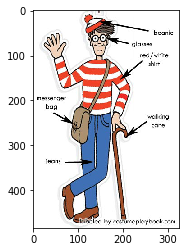

In [31]:
# Read waldo template
waldo_template = plt.imread(waldo_template_path)
waldo_template = waldo_template/255.
# waldo_template = cv2.cvtColor(waldo_template, cv2.COLOR_BGR2RGB)
print(waldo_template.shape)
plt.imshow(waldo_template)

In [47]:
# Vectorize template
template_vector = waldo_template.reshape((-1, 3))
template_vector = np.float32(template_vector)

# OpenCV Clustering Method
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
restarts = 10 # Random initializations
k = 7 # Number of clusters - equals number of colors
_, labels, centers = cv2.kmeans(template_vector, k, None, criteria, restarts, cv2.KMEANS_PP_CENTERS)

In [48]:
# Sci-Kit Learn KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans = kmeans.fit(template_vector)

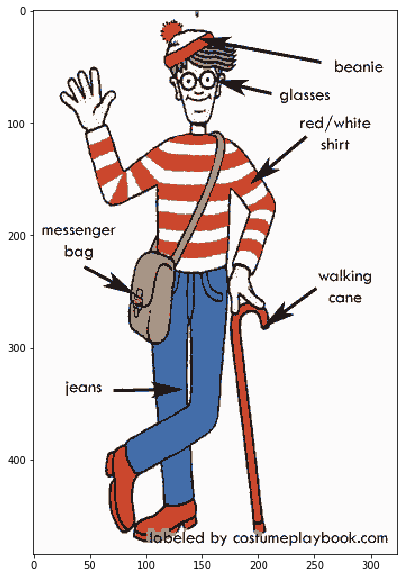

In [52]:
# OpenCV Clustering
centers = np.uint8(centers)
clustered_template = centers[labels.flatten()]
clustered_template = clustered_template.reshape((waldo_template.shape))

# SKLearn Clustering
clustered_template = kmeans.cluster_centers_[kmeans.labels_]
clustered_template = clustered_template.reshape((waldo_template.shape))

# Display clustered template
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(clustered_template)

(7015, 4960, 3)


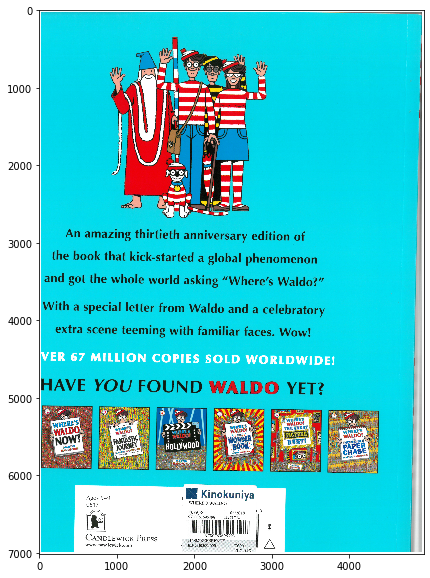

In [53]:
# Segment another image based on this template
# Load and show image
waldo_example = plt.imread(waldo_example_path)
waldo_example = waldo_example/255.
print(waldo_example.shape)
plt.imshow(waldo_example) # Quite large, might take a while to load

(7015, 4960, 3)


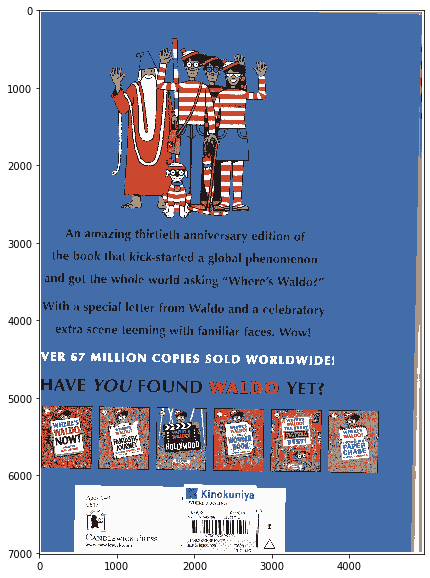

In [54]:
# Perform clustering on example
example_vector = waldo_example.reshape((-1, 3))
example_vector = np.float32(example_vector)

example_labels = kmeans.predict(example_vector)
clustered_example = kmeans.cluster_centers_[example_labels]
clustered_example = clustered_example.reshape((waldo_example.shape))
print(clustered_example.shape)
plt.imshow(clustered_example)

Text(0.5, 1.0, 'Clustered')

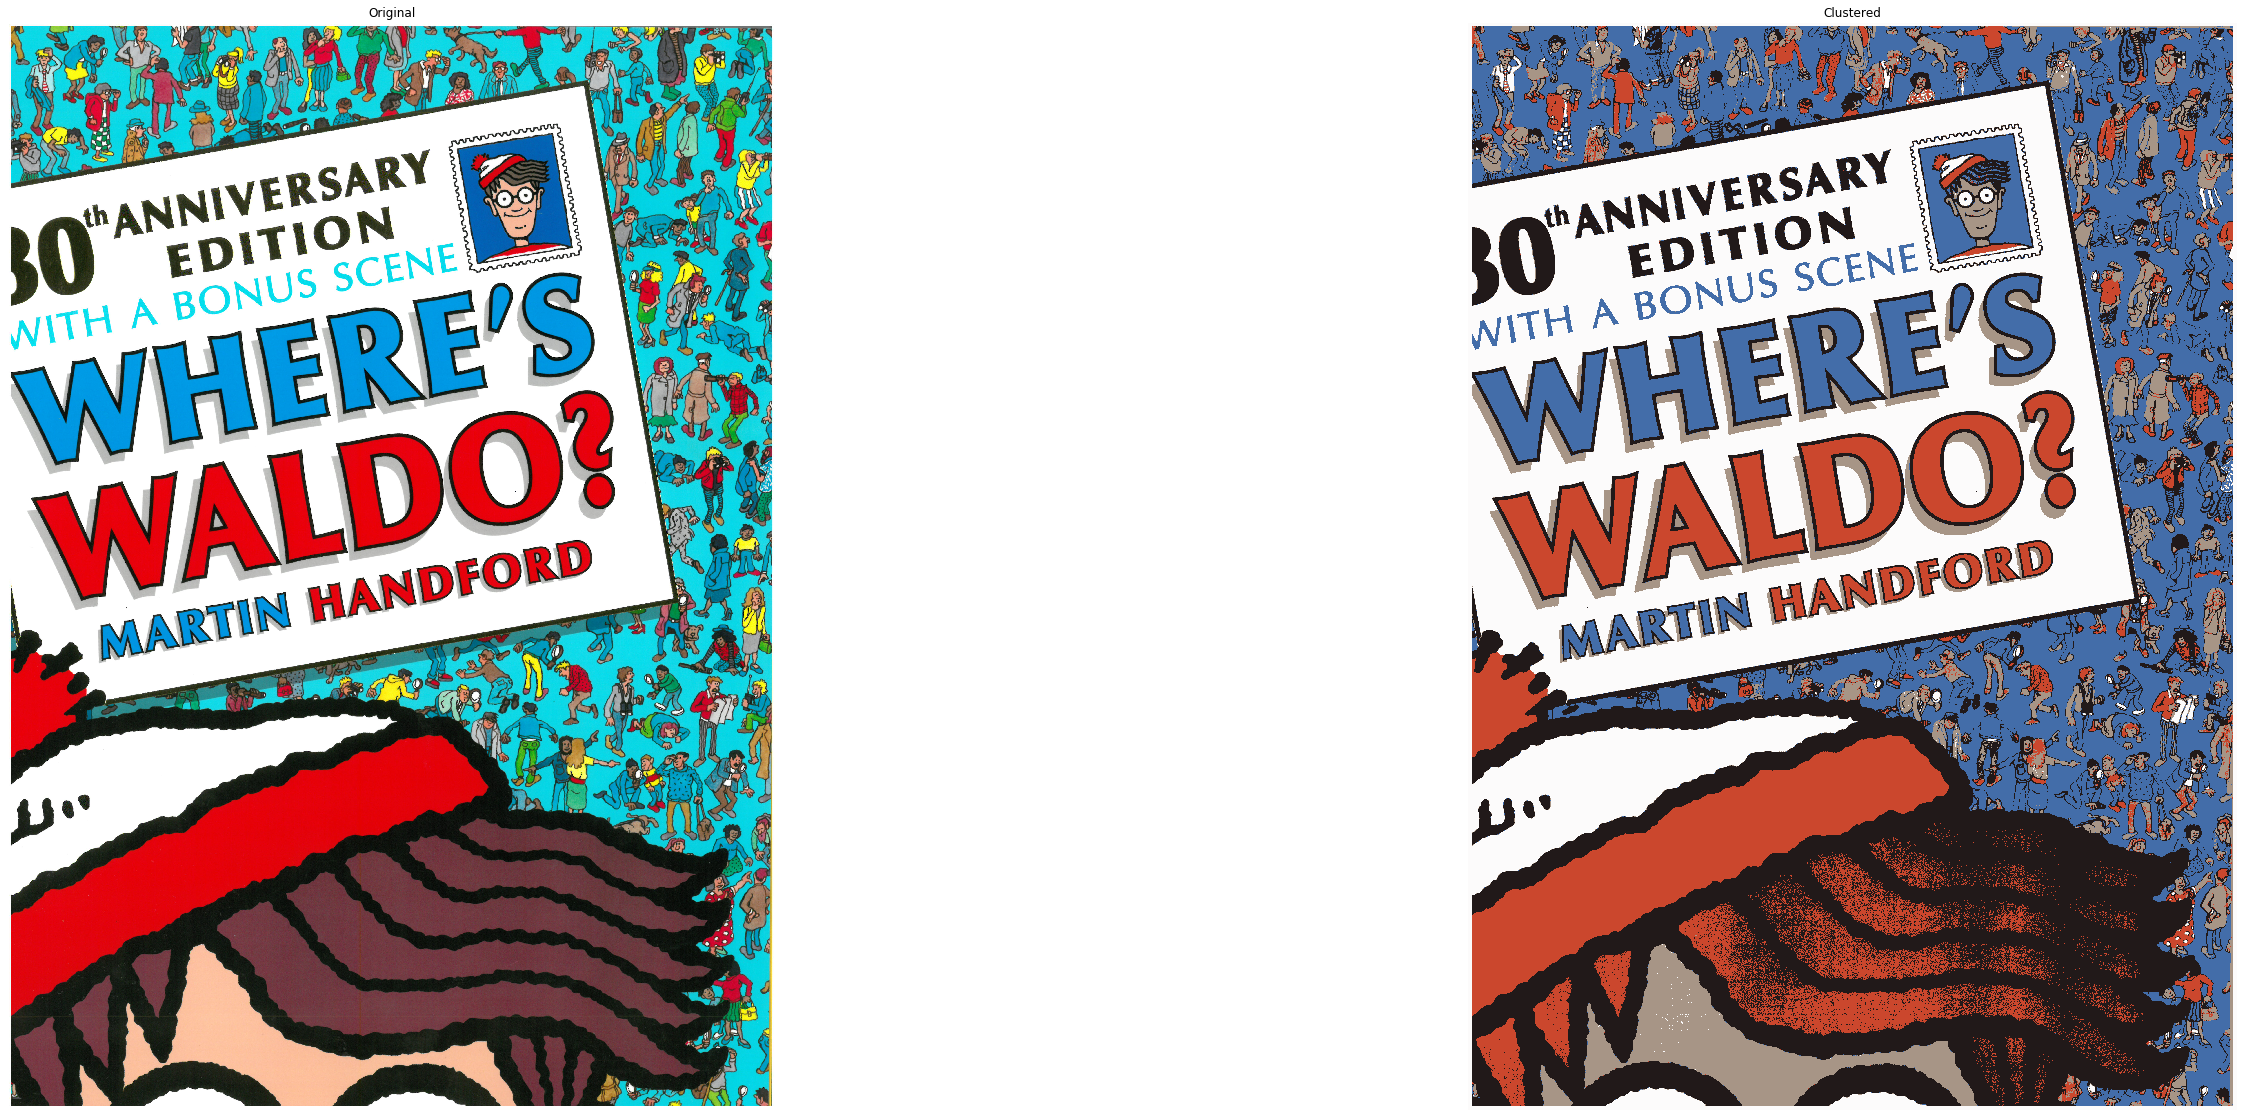

In [55]:
# Second example
waldo_example_2 = plt.imread(waldo_example_path_2)
waldo_example_2 = waldo_example_2/255.

example_vector_2 = waldo_example_2.reshape((-1, 3))
example_vector_2 = np.float32(example_vector_2)
example_labels_2 = kmeans.predict(example_vector_2)
clustered_example_2 = kmeans.cluster_centers_[example_labels_2]
clustered_example_2 = clustered_example_2.reshape((waldo_example_2.shape))

plt.rcParams['figure.figsize'] = (48.0, 20)
plt.subplot(1,2,1)
plt.imshow(waldo_example_2)
plt.axis('off')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(clustered_example_2)
plt.axis('off')
plt.title('Clustered')